Primeiramente, importa-se as bibliotecas que serao usadas ao decorrer da análise do dataset.

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

E, logo em seguida, o dataset que será usado nesta análise. O dataset "QS World University Rankings combined" apresenta o rankeamento das universidades de todo o mundo e outras informaçoes a respeito delas.

In [168]:
df = pd.read_csv("QS World University Rankings combined.csv")
df.head(10)

,year,rank_display,university,score,link,country,city,region,logo
0,2017,1,Massachusetts Institute of Technology (MIT),100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
1,2017,2,Stanford University,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...
2,2017,3,Harvard University,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
3,2017,4,University of Cambridge,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...
4,2017,5,California Institute of Technology (Caltech),96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...
5,2017,6,University of Oxford,96.8,https://www.topuniversities.com/universities/u...,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...
6,2017,7,UCL,95.6,https://www.topuniversities.com/universities/ucl,United Kingdom,London,Europe,https://www.topuniversities.com/sites/default/...
7,2017,8,ETH Zurich - Swiss Federal Institute of Techno...,94.2,https://www.topuniversities.com/universities/e...,Switzerland,Zürich,Europe,https://www.topuniversities.com/sites/default/...
8,2017,9,Imperial College London,94.1,https://www.topuniversities.com/universities/i...,United Kingdom,London,Europe,https://www.topuniversities.com/sites/default/...
9,2017,10,University of Chicago,93.0,https://www.topuniversities.com/universities/u...,United States,Chicago,North America,https://www.topuniversities.com/sites/default/...


In [169]:
df.tail(10)

,year,rank_display,university,score,link,country,city,region,logo
6472,2022,1201+,University of Sarajevo,NaN,https://www.topuniversities.com/universities/u...,Bosnia and Herzegovina,Sarajevo,Europe,https://www.topuniversities.com/sites/default/...
6473,2022,1201+,University of Split,NaN,https://www.topuniversities.com/universities/u...,Croatia,Split,Europe,https://www.topuniversities.com/sites/default/...
6474,2022,1201+,Università degli studi di Bergamo,NaN,https://www.topuniversities.com/universities/u...,Italy,Bergamo,Europe,https://www.topuniversities.com/sites/default/...
6475,2022,1201+,Université Mohammed V de Rabat,NaN,https://www.topuniversities.com/universities/u...,Morocco,Rabat,Africa,https://www.topuniversities.com/sites/default/...
6476,2022,1201+,Université de Caen Normandie,NaN,https://www.topuniversities.com/universities/u...,France,Caen,Europe,https://www.topuniversities.com/sites/default/...
6477,2022,1201+,Université de Tunis,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...
6478,2022,1201+,Université de Tunis El Manar,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...
6479,2022,1201+,Yarmouk University,NaN,https://www.topuniversities.com/universities/y...,Jordan,Irbid,Asia,https://www.topuniversities.com/sites/default/...
6480,2022,1201+,Yildiz Technical University,NaN,https://www.topuniversities.com/universities/y...,Turkey,Istanbul,Asia,https://www.topuniversities.com/sites/default/...
6481,2022,1201+,Zagazig University,NaN,https://www.topuniversities.com/universities/z...,Egypt,Zagazig,Africa,https://www.topuniversities.com/sites/default/...


Primeira informaçao útil a ser retirada é saber o ranking de quais anos está presente neste dataset. Assim, observamos que o dataset possui o ranking de cinco anos, desde 2017.

In [171]:
years = df["year"].unique()
years

array([2017, 2018, 2019, 2020, 2021, 2022])

E que os rankeamentos nao estao igualmente distribuídos, há anos que houve com mais e menos universidades nos rankings.

In [172]:
for year in years:
  uni = df[df["year"] == year].shape[0]
  print(f"No ano {year}, o rankeamento contemplava {uni} universidades.")

No ano 2017, o rankeamento contemplava 933 universidades.
No ano 2018, o rankeamento contemplava 977 universidades.
No ano 2019, o rankeamento contemplava 1018 universidades.
No ano 2020, o rankeamento contemplava 1069 universidades.
No ano 2021, o rankeamento contemplava 1185 universidades.
No ano 2022, o rankeamento contemplava 1300 universidades.


Assim, antes de começar a trabalhar no dataset, deve-se avaliar a presença de valores faltantes e como tratá-los.

In [173]:
df.isna().sum()

year               0
rank_display      68
university         0
score           3678
link               0
country            0
city             178
region             0
logo               0
dtype: int64

Ou seja, há missing values em 3 features e agora torna-se necessário avaliar a natureza delas.

In [174]:
df[df["rank_display"].isna()]

,year,rank_display,university,score,link,country,city,region,logo
914,2017,NaN,"University of California, San Francisco",NaN,https://www.topuniversities.com/universities/u...,United States,San Francisco,North America,https://www.topuniversities.com/sites/default/...
915,2017,NaN,Karolinska Institutet,NaN,https://www.topuniversities.com/universities/k...,Sweden,Stockholm,Europe,https://www.topuniversities.com/sites/default/...
916,2017,NaN,Jawaharlal Nehru University,NaN,https://www.topuniversities.com/universities/j...,India,New Delhi,Asia,https://www.topuniversities.com/sites/default/...
917,2017,NaN,INSEAD,NaN,https://www.topuniversities.com/universities/i...,France,Fontainebleau,Europe,https://www.topuniversities.com/sites/default/...
918,2017,NaN,London Business School,NaN,https://www.topuniversities.com/universities/l...,United Kingdom,London,Europe,https://www.topuniversities.com/sites/default/...
...,...,...,...,...,...,...,...,...,...
5152,2021,NaN,"University of California, San Francisco",NaN,https://www.topuniversities.com/universities/u...,United States,San Francisco,North America,https://www.topuniversities.com/sites/default/...
5154,2021,NaN,Prague University of Economics and Business,NaN,https://www.topuniversities.com/universities/p...,Czech Republic,Prague,Europe,https://www.topuniversities.com/sites/default/...
5169,2021,NaN,University of the Arts London,NaN,https://www.topuniversities.com/universities/u...,United Kingdom,London,Europe,https://www.topuniversities.com/sites/default/...
5177,2021,NaN,Weizmann Institute of Science,NaN,https://www.topuniversities.com/universities/w...,Israel,Rehovot,Asia,https://www.topuniversities.com/sites/default/...


E percebe-se que todos os casos de missing values na feature "rank_display" estao acompanhados de missing values na feature "score". Assim, faz-se interessante primeiro analisar e buscar um padrao para os missing values na feature "score", que apresenta bem mais casos de valores faltantes.

In [175]:
df[df["score"].isna()]

,year,rank_display,university,score,link,country,city,region,logo
400,2017,401-410,Bandung Institute of Technology (ITB),NaN,https://www.topuniversities.com/universities/b...,Indonesia,Bandung,Asia,https://www.topuniversities.com/sites/default/...
401,2017,401-410,Brandeis University,NaN,https://www.topuniversities.com/universities/b...,United States,Waltham,North America,https://www.topuniversities.com/sites/default/...
402,2017,401-410,Illinois Institute of Technology,NaN,https://www.topuniversities.com/universities/i...,United States,Chicago,North America,https://www.topuniversities.com/sites/default/...
403,2017,401-410,Johannes Gutenberg Universität Mainz,NaN,https://www.topuniversities.com/universities/j...,Germany,Mainz,Europe,https://www.topuniversities.com/sites/default/...
404,2017,401-410,Khalifa University of Science and Technology,NaN,https://www.topuniversities.com/universities/k...,United Arab Emirates,Abu Dhabi,Asia,https://www.topuniversities.com/sites/default/...
...,...,...,...,...,...,...,...,...,...
6477,2022,1201+,Université de Tunis,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...
6478,2022,1201+,Université de Tunis El Manar,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...
6479,2022,1201+,Yarmouk University,NaN,https://www.topuniversities.com/universities/y...,Jordan,Irbid,Asia,https://www.topuniversities.com/sites/default/...
6480,2022,1201+,Yildiz Technical University,NaN,https://www.topuniversities.com/universities/y...,Turkey,Istanbul,Asia,https://www.topuniversities.com/sites/default/...


Para visualizar a presença dos missing values e buscar um padrao em suas aparições, faz-se extremamente útil utilizar um mapa de calor que evidencia onde(qual linha do dataset) e em qual feature há valor faltante, para cada um dos 6 anos. 

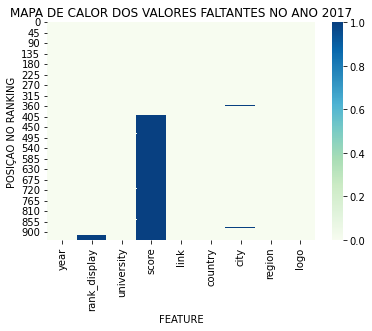

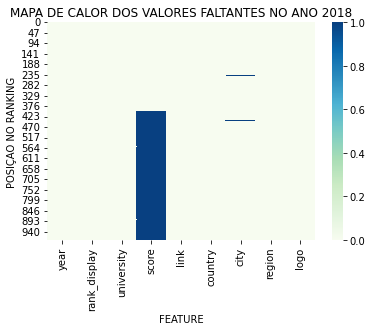

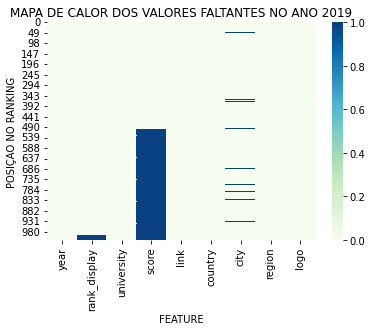

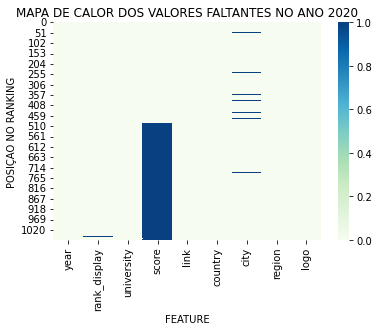

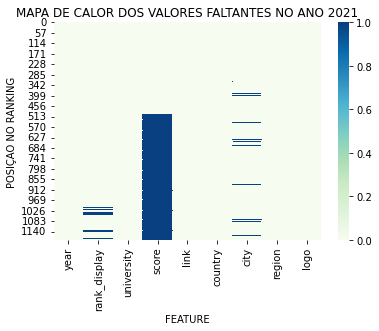

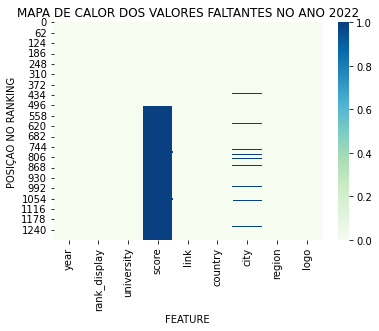

In [176]:
for i,year in enumerate(years):
  fig, ax = plt.subplots()
  sns.heatmap(df[df["year"] == year ].reset_index(drop = True).isna(), cmap = "GnBu", ax=ax)

  ax.set_title(f"MAPA DE CALOR DOS VALORES FALTANTES NO ANO {year}")
  ax.set_xlabel("FEATURE")
  ax.set_ylabel("POSIÇAO NO RANKING")

plt.show()

E aqui é possível perceber que os missing values na feature "score" nao sao aleatórios, na verdade, nao há atribuiçao de "score" às universidades com baixa classificaçao - a partir do rankeamento 401 ou 501 aproximadamente nenhuma universidade apresenta "score", em todos os anos- o que faz sentido, quanto mais baixa a classificaçao, mais difícil é diferenciar o desempenho de uma universidade do de outra. Além disso, os missing values na feature "rank_display" também nao sao aleatórios, basicamente as universidades que nao apresentam "rank_display" nem "score" sao as que estariam nas mais baixas posições do rankeamento.

Desse modo, é possível tratar os valores faltantes de ambas features.

Primeiramente, os missing values em "score" serao substituídos por valores gradativamente menores de acordo com o rankeamento que estao, tendo como valor de partida, o menor valor de "score" de cada ano.

Além disso, os missing values em "rank_display" serao substituídos pelo menor rankeamento de cada ano, de modo que as universidades previamente sem rankeamento passarao a estar no pior posiçao do ranking.

In [177]:
for year in years:
  categorias = df[(df.year == year) & (df.score.isna())]["rank_display"].unique()

  menor_categoria = categorias[-2] # O penúltimo elemento é sempre a menor categoria para os anos que contém missing values em "rank-display", porque a última categoria é "nan".
  
  menor_score = df[ df.year == year]["score"].min()

  df.loc[(df.year == year) & (df["rank_display"].isna()), "rank_display"] = menor_categoria
  #print(f'No ano {ano}, o menor score foi {menor} e havia as seguintes categorias:')

  for i,categoria in enumerate(categorias,1):
    #print(f" A categoria {categoria} apresentará score: {menor_score-i}")
    df.loc[(df["year"] == year) & (df['rank_display'] == categoria), "score"] = menor_score - i
    
df

,year,rank_display,university,score,link,country,city,region,logo
0,2017,1,Massachusetts Institute of Technology (MIT),100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
1,2017,2,Stanford University,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...
2,2017,3,Harvard University,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
3,2017,4,University of Cambridge,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...
4,2017,5,California Institute of Technology (Caltech),96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...
...,...,...,...,...,...,...,...,...,...
6477,2022,1201+,Université de Tunis,7.1,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...
6478,2022,1201+,Université de Tunis El Manar,7.1,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...
6479,2022,1201+,Yarmouk University,7.1,https://www.topuniversities.com/universities/y...,Jordan,Irbid,Asia,https://www.topuniversities.com/sites/default/...
6480,2022,1201+,Yildiz Technical University,7.1,https://www.topuniversities.com/universities/y...,Turkey,Istanbul,Asia,https://www.topuniversities.com/sites/default/...


E agora podemos confirmar que todos os missing values das features "rank_display" e "score" foram tratadas. Logo, agora deve-se tratar dos missing values da feature "city".

In [178]:
df.isna().sum()

year              0
rank_display      0
university        0
score             0
link              0
country           0
city            178
region            0
logo              0
dtype: int64

E, como foi anteriormente, observa-se os exemplos de missing values e busca-se um padrao ou uma possível justificativa para que determinadas universidades nao tenham tido sua cidade atribuída na feature "city".

In [179]:
df[df["city"].isna()]

,year,rank_display,university,score,link,country,city,region,logo
116,2017,117,Aarhus University,59.5,https://www.topuniversities.com/universities/a...,Denmark,NaN,Europe,https://www.topuniversities.com/sites/default/...
194,2017,195,Queen's University Belfast,47.5,https://www.topuniversities.com/universities/q...,United Kingdom,NaN,Europe,https://www.topuniversities.com/sites/default/...
241,2017,=241,Université Paris-Saclay,42.0,https://www.topuniversities.com/universities/u...,France,NaN,Europe,https://www.topuniversities.com/sites/default/...
265,2017,=264,Kyung Hee University,39.2,https://www.topuniversities.com/universities/k...,South Korea,NaN,Asia,https://www.topuniversities.com/sites/default/...
344,2017,=345,Brunel University London,33.8,https://www.topuniversities.com/universities/b...,United Kingdom,NaN,Europe,https://www.topuniversities.com/sites/default/...
...,...,...,...,...,...,...,...,...,...
6405,2022,1201+,Moscow City University,7.1,https://www.topuniversities.com/universities/m...,Russia,NaN,Europe,https://www.topuniversities.com/sites/default/...
6408,2022,1201+,National Taipei University,7.1,https://www.topuniversities.com/universities/n...,Taiwan,NaN,Asia,https://www.topuniversities.com/sites/default/...
6422,2022,1201+,Technical University of Cluj-Napoca,7.1,https://www.topuniversities.com/universities/t...,Romania,NaN,Europe,https://www.topuniversities.com/sites/default/...
6427,2022,1201+,Transilvania University of Brasov,7.1,https://www.topuniversities.com/universities/t...,Romania,NaN,Europe,https://www.topuniversities.com/sites/default/...


E aqui percebe-se que valores faltantes para a feature "city" nao apresenta um padrao como havia para os missing values das outras features - há universidades com rankeamento alto e baixo que nao apresentam - logo o tratamento aqui se torna inviável (além de que a feature "city" nao será profundamente utilizada nesta análise). Porém, percebe-se também que a maior parte das universidades, se nao todas, apresentam a cidade em que estao sediadas no próprio nome, ou seja, isso poderia resultar em uma soluçao.

Agora, tendo os missing values tratados, começa-se a análise do dataset. Primeiramente, é bom deixar claro que nao há necessidade de normalizar o dataset, porque só há uma feature que apresenta uma grandeza numérica nao discreta (que é o score) e é a única que será numericamente manuseada, as demais somente serao usadas em suas naturezas categóricas.Desse modo, começa-se a análise vendo a quantidade de universidades por continente e o score médio de cada. Como o dataset contém o rankeamento de seis anos, para saber a quantidade de universidades por continente é necessário filtrar o dataset para apenas um dos anos, caso contrário obteríamos a quantidade de universidades de todo o dataset, o que representaria um valor errado que contabilizaria repetidamente as mesmas universidades em anos diferentes. Logo, o ano de 2022 será o usado porque é o que contempla a maior quantidade de universidades. 

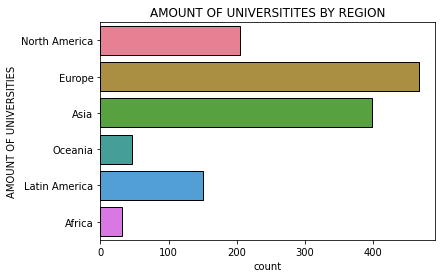

In [192]:
df_2022 = df[df["year"] == 2022]

sns.countplot(y = "region", data = df_2022, ec = "black", palette = "husl")
plt.ylabel("AMOUNT OF UNIVERSITIES")
plt.title("AMOUNT OF UNIVERSITITES BY REGION")
plt.show()

Observa-se a quantidade esmagadora de universidades europeias presentes no rankeamento.

Vê-se também o score médio de cada regiao, e aqui nao há necessidade de filtrar o dataset a um único ano.

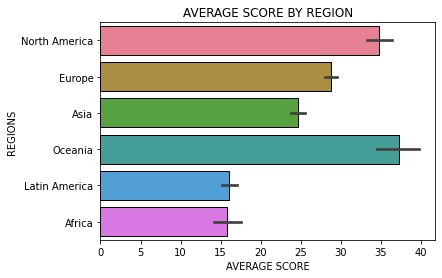

In [193]:
sns.barplot(x = "score", y = "region", data = df, ec = "black", palette = "husl")

plt.xlabel("AVERAGE SCORE")
plt.ylabel("REGIONS")
plt.title("AVERAGE SCORE BY REGION")
plt.show()

Aqui curiosamente observa-se uma sutíl vantagem da média de score da Oceania, seguida pelo continente norte-americano.

E para finalizar a análise direcionada aos continentes, observa-se também qual foi a universidade de cada país a obter o maior score ao longo dos 6 anos de rankeamento, qual posiçao ela assumiu com este score e a qual cidade pertence.

In [205]:
regions = df["region"].unique()
for region in regions:
  id = df[df.region == region].score.idxmax()
  uni = df.iloc[id]
  print(f"{uni.region}:\nNo ano de {uni.year}, a universidade {uni.university},{uni.city} apresentou o maior score com pontuaçao {uni.score} ocupando a posiçao {uni.rank_display} do ranking.\n")

North America:
No ano de 2017, a universidade Massachusetts Institute of Technology (MIT) ,Cambridge apresentou o maior score com pontuaçao 100.0 ocupando a posiçao 1 do ranking.

Europe:
No ano de 2022, a universidade University of Oxford,Oxford apresentou o maior score com pontuaçao 99.5 ocupando a posiçao 2 do ranking.

Asia:
No ano de 2022, a universidade National University of Singapore (NUS),Singapore apresentou o maior score com pontuaçao 93.9 ocupando a posiçao 11 do ranking.

Oceania:
No ano de 2017, a universidade The Australian National University,Canberra apresentou o maior score com pontuaçao 87.3 ocupando a posiçao 22 do ranking.

Latin America:
No ano de 2018, a universidade Universidad de Buenos Aires (UBA),Buenos Aires apresentou o maior score com pontuaçao 69.1 ocupando a posiçao 75 do ranking.

Africa:
No ano de 2018, a universidade University of Cape Town,Cape Town apresentou o maior score com pontuaçao 48.9 ocupando a posiçao 191 do ranking.



Agora, ao invés de analisar por continente, veremos score médio e quantidade de universidades por país, considerando apenas os 10 primeiros porque há muitos países.

In [196]:
countries = df["country"].unique()

amount_c = len(countries)

print(f"{ amount_c } países diferentes são contemplados neste rankeamento.")

97 países diferentes são contemplados neste rankeamento.


Aqui observa-se os países que mais apresentam universidades no rankeamento.

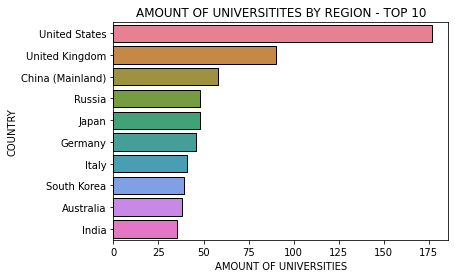

In [183]:
top_10 = df_2022["country"].value_counts().iloc[:10].index
sns.countplot(y = "country",data = df_2022,order = top_10,ec = "black", palette = "husl")

plt.xlabel("AMOUNT OF UNIVERSITIES")
plt.ylabel("COUNTRY")
plt.title("AMOUNT OF UNIVERSITITES BY REGION - TOP 10")
plt.show()

E, posteriormente, os países que apresentam os maiores scores médios.

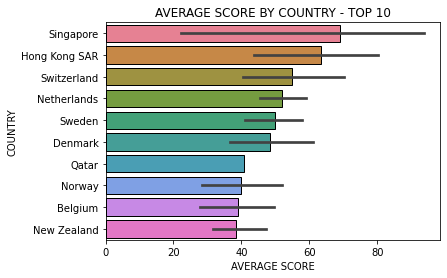

In [184]:
top_10 = df_2022.groupby("country").mean().sort_values("score", ascending = False).index[0:10]
sns.barplot(x = "score", y = "country", data = df_2022, order = top_10, ec = "black", palette = "husl")

plt.xlabel("AVERAGE SCORE")
plt.ylabel("COUNTRY")
plt.title("AVERAGE SCORE BY COUNTRY - TOP 10")
plt.show()

Além disso, pode-se saber qual universidade teve o maior aumento de score de um ao para o outro(consecutivamente) e qual teve o maior aumento total(dentre os 6 anos de rankeamento).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN axis encountered
  


 A universidade que apresenta maior aumento consecutivo de score é a(o) Université Paris-Saclay com aumento de  30.9000.


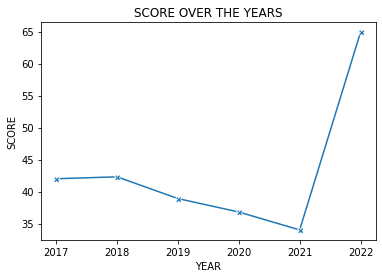

In [185]:
max_score = {}
min_score = {}
sum_score = {}

for uni in df["university"]:
  diffs = df[ df['university'] == uni ][ 'score' ].diff(periods = 1)
  max_score[uni] = np.nanmax(diffs)
  min_score[uni] = np.nanmin(diffs)
  sum_score[uni] = diffs.sum()

uni = max(max_score, key = max_score.get)
print(f' A universidade que apresenta maior aumento consecutivo de score é a(o) {uni} com aumento de {max_score[uni]: .4f}.')

sns.lineplot(x = "year", y = "score", data = df[df["university"] == uni], marker = 'X')

plt.title("SCORE OVER THE YEARS")
plt.xlabel("YEAR")
plt.ylabel("SCORE")
plt.show()



E percebe-se facilmente que este aumento é referente à diferença entre os anos de 2021 e 2022.

Logo em seguida, vê-se que este aumento também corresponde ao maior aumento geral, com um ganho equivalente a 22.9 pontos.

 A universidade que apresenta maior aumento total de score é a(o) Université Paris-Saclay com aumento de  22.9000.


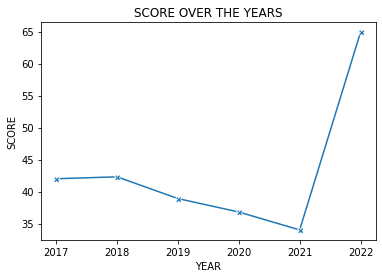

In [186]:
uni = max(sum_score, key = sum_score.get)
print(f' A universidade que apresenta maior aumento total de score é a(o) {uni} com aumento de {sum_score[uni]: .4f}.')

sns.lineplot(x = "year", y = "score", data = df[df["university"] == uni], marker = 'X')

plt.title("SCORE OVER THE YEARS")
plt.xlabel("YEAR")
plt.ylabel("SCORE")
plt.show()

E para finalizar a análise, pode-se saber também quais foram as universidades a apresentar maiores decréscimos no score.

 A universidade que apresenta maior decréscimo consecutivo de score é a(o) Sant'Anna - Scuola Universitaria Superiore Pisa com decréscimo de -38.7000.


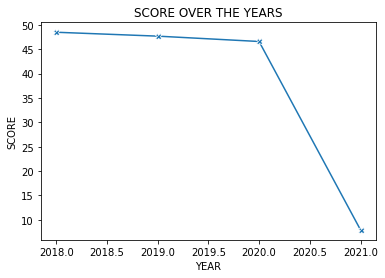

In [188]:
uni = min(min_score, key = min_score.get)
print(f' A universidade que apresenta maior decréscimo consecutivo de score é a(o) {uni} com decréscimo de {min_score[uni]: .4f}.')

sns.lineplot(x = "year", y = "score", data = df[df["university"] == uni], marker = 'X')

plt.title("SCORE OVER THE YEARS")
plt.xlabel("YEAR")
plt.ylabel("SCORE")
plt.show()


Perceb-se também facilmente que este decréscimo foi entre os anos de 2020 e 2021 e que a universidade nao estava presente nos rankeamentos de 2017 e 2022.

 A universidade que apresenta maior decréscimo total de score é a(o) Scuola Normale Superiore com decréscimo de -35.5000.


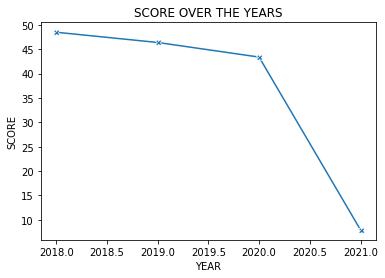

In [191]:
uni = min(sum_score, key = sum_score.get)
print(f' A universidade que apresenta maior decréscimo total de score é a(o) {uni} com decréscimo de {min_score[uni]: .4f}.')

sns.lineplot(x = "year", y = "score", data = df[df["university"] == uni], marker = 'X')

plt.title("SCORE OVER THE YEARS")
plt.xlabel("YEAR")
plt.ylabel("SCORE")
plt.show()


E, por fim, esta foi a universidade a apresentar o maior decréscimo total.